### <font color="brown">Problem Set 11: Data Exploration</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

---

### Problem 1

##### In this problem, you will explore a breast cancer dataset, breastCancer.csv

In [2]:
data = pd.read_csv("./data/breastCancer.csv")
data

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,yes,2,left,left_low,no,no-recurrence-events
282,50-59,premeno,25-29,3-5,yes,2,left,left_low,yes,no-recurrence-events
283,30-39,premeno,30-34,6-8,yes,2,right,right_up,no,no-recurrence-events
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no,no-recurrence-events


#### <font color="brown">1.1</font>

Perform plotting for this task using the inbuilt functions in Pandas.

1. Plot a histogram of 'Class' where 'breast-quad' and 'node-caps' are not NaN. 
2. In the column "inv-nodes", replace the class interval values by class mean, e.g., 3-5 becomes 4. Plot  a histogram of 'inv-nodes' divided into 5 bins.

<Axes: >

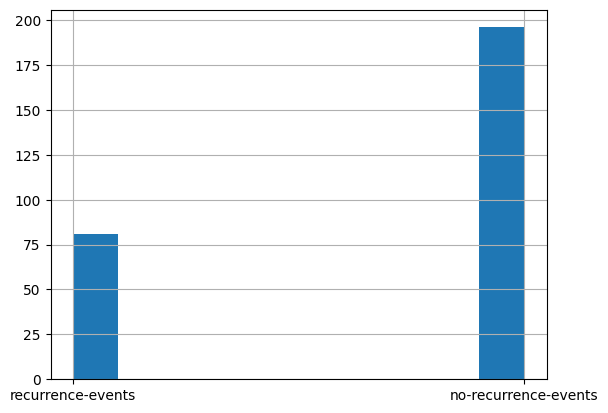

In [3]:
# 1
df1 = data[data['breast-quad'].notna() & data['node-caps'].notna()]
df1['Class'].hist()

In [4]:
# 2
def avg_of_ranges(range_str):
    lower, upper = map(int, range_str.split('-'))
    return (lower+upper)/2
data['inv-nodes'] = data['inv-nodes'].apply(avg_of_ranges)
data['inv-nodes']


0      1.0
1      1.0
2      1.0
3      1.0
4      4.0
      ... 
281    7.0
282    4.0
283    7.0
284    1.0
285    1.0
Name: inv-nodes, Length: 286, dtype: float64

#### <font color="brown">1.2</font>

Drop all null values before starting with these tasks.

1. Just like the "inv-nodes" column, replace the class interval values by class mean in the "tumor-size" column and plot a bar graph of the average tumor size for each "age" group.
2. For each menopause stage, plot a pie chart for degree of malignancy (deg-malig) values. Use subplots, where each subplot handles a menopause stage.
3. Label the recurrence and no-recurrence events as 0 and 1 respectively and plot a histogram to show the frequency of recurrence and no-recurrence events for different "breast-quad" values. Use subplots for the different breast-quad values.

In [5]:
# Drop all null values
data = data.dropna()

na_count = data.isna().sum()
print(na_count)

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64


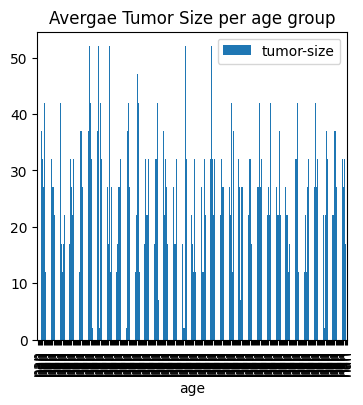

In [6]:
# 1
data2 = data.copy()
data2['tumor-size'] = data['tumor-size'].apply(avg_of_ranges)
data2['tumor-size']

data2['age'] = pd.to_numeric(data2['age'], errors='coerce')
data2['tumor-size'] = pd.to_numeric(data2['tumor-size'], errors='coerce')

axis = data2.plot(x='age',y='tumor-size',kind='bar', title='Avergae Tumor Size per age group',figsize=(4,4))

<Axes: ylabel='deg-malig'>

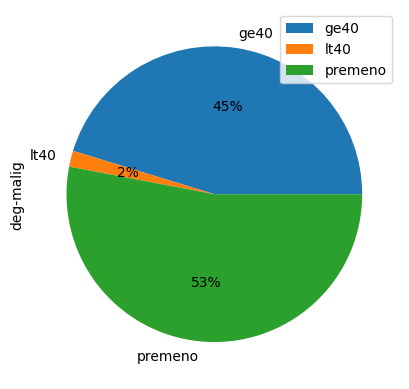

In [7]:
# 2
data.groupby(['menopause']).sum().plot( 
    kind='pie', y='deg-malig', autopct='%1.0f%%') 

In [8]:
# 3


---

### Problem 2

The following list shows the sales of items per month in a particular year. The months are labelled from 1 to 12. The total units per month are sum of all the units of items per months. 

In [9]:
facecream_sales = [2500, 2630, 2140, 3400, 3600, 2760, 2980, 3700, 3540, 1990, 2340, 2900]
shampoo_sales = [1200, 2100, 3550, 1870, 1560, 1890, 1780, 2860, 2100, 2300, 2400, 1800]
toothpaste_sales = [5200, 5100, 4550, 5870, 4560, 4890, 4780, 5860, 6100, 8300, 7300, 7400]
facewash_sales = [1500, 1200, 1340, 1130, 1740, 1555, 1120, 1400, 1780, 1890, 2100, 1760]

The profit distribution (multipler of sales numbers) is as follows: 

* facecream = 5 
* shampoo = 3
* toothpaste = 10

The total profit (per month) is calculated as the individual profit amount times the number of units per month.


1. Display the toothpaste sales data of each month and show it using a scatter plot. Also, add a grid in the plot. gridline style should be “–“.

2. Plot comparative monthly facecream and shampoo product sales data in a bar chart. 

3. Plot toothpaste and facewash sales data for each month in separate line plots in a vertically stacked grid.

4. Plot the total annual sales for all the products in a pie chart. In each slice of the pie, display the percentage sale of that product relative to the total sales of all products.

5. Plot a histogram for the total monthly profites of all products. Use 5 bins, and set the histogram ranges accordingly.


---

#### Problem 3

Here is the relative popularity figures for some programming languages:

<pre>
Programming languages: Java, Python, PHP, JavaScript, C#, C++ 
Popularity: 22.2, 17.6, 8.8, 8, 7.7, 6.7
</pre>

Plot a bar chart of these popularities. Attach a text label above each bar displaying its popularity.

In [10]:
from pandas import DataFrame

df3 = {'Programming languages': ['Java','Python','PHP','JavaScript','C#','C++'], 'Popularity': [22.2,17.6,8.8,8,7.7,6.7]}
df3 = DataFrame(df3)
df3

,Programming languages,Popularity
0,Java,22.2
1,Python,17.6
2,PHP,8.8
3,JavaScript,8.0
4,C#,7.7
5,C++,6.7


<Axes: title={'center': 'Popularity of Programming Languages'}, xlabel='Programming languages'>

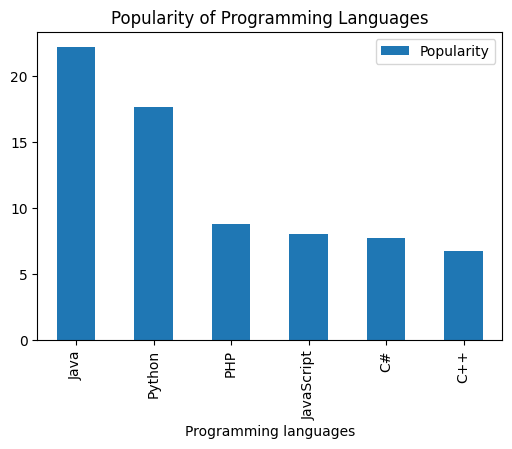

In [13]:
df3.plot(kind='bar', x='Programming languages', y='Popularity', title='Popularity of Programming Languages', figsize=(6,4))